### Ce script permet de faires les changements suite à l'appel avec Agathe et Noemie fin decembre 2024 sur les points suivants:
- 

## Packages

In [45]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pylab as plt

import statsmodels.api as sm
import datetime

## Open Data

In [46]:
# Open cleaned data for analysis
data_day = pd.read_csv('../raw_data/Trektellen/tableaux_finaux/data_day_for_analysis.csv')
#select from 2016 to 2023
data_day = data_day[(data_day['year'] >= 2016)]

In [47]:
data_hour = pd.read_csv('../raw_data/Trektellen/tableaux_finaux/data_hour_for_analysis.csv')
data_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47336 entries, 0 to 47335
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date_dt     47336 non-null  object
 1   year        47336 non-null  int64 
 2   month       47336 non-null  int64 
 3   day         47336 non-null  int64 
 4   timestamp   43528 non-null  object
 5   species     47336 non-null  object
 6   direction1  47336 non-null  int64 
 7   direction2  47336 non-null  int64 
 8   local       47336 non-null  int64 
 9   age         9478 non-null   object
 10  sex         3455 non-null   object
 11  plumage     920 non-null    object
dtypes: int64(6), object(6)
memory usage: 4.3+ MB


## Filtrer les bonnes periodes

### Selectionner:
- TOUTES LES ESPECES (toutes_les_especes) puis selection du Milan noir, cigogne blanche, cigogne noire, épervier d'europe, bondrée apivore: (= liste_top_especes)
  - 2016-2020 : 15 juillet au 15 septembre
  - 2021 à 2023 : 15 juillet - 30 septembre
- Milan royal (milan_royal):
  - 2016 - 2023 : toute la période min max

In [48]:
data_day.loc[:, 'date_dt'] = pd.to_datetime(data_day['date_dt'])

data_day['day_month'] = data_day['date_dt'].dt.strftime('%d-%B')

# Convert month to French
month_translation = {
    'June': 'juin', 'July': 'juil', 'August': 'août', 'September': 'sept', 'October': 'oct', 'November': 'novembre'
}

data_day['day_month'] = data_day['day_month'].replace(month_translation, regex=True)
data_day = data_day.sort_values(by='date_dt')

data_day = data_day[['year', 'date_dt', 'species', 'direction1', 'direction2', 'maxlocal', 'day_month', 'observers']]
data_day

/var/folders/p7/90k2qrqs4fvbt30f5t6x0glc0000gn/T/ipykernel_44505/228339673.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_day.loc[:, 'date_dt'] = pd.to_datetime(data_day['date_dt'])


,year,date_dt,species,direction1,direction2,maxlocal,day_month,observers
627,2016,2016-07-15,Faucon crécerelle,0.0,0.0,2.0,15-juil,"margaux ruiz, lauriane de gail, Gabriel sauvé,..."
628,2016,2016-07-15,laridé spec.,1.0,0.0,0.0,15-juil,"margaux ruiz, lauriane de gail, Gabriel sauvé,..."
629,2016,2016-07-15,Vautour percnoptère,0.0,0.0,2.0,15-juil,"margaux ruiz, lauriane de gail, Gabriel sauvé,..."
630,2016,2016-07-15,Buse variable,0.0,0.0,1.0,15-juil,"margaux ruiz, lauriane de gail, Gabriel sauvé,..."
631,2016,2016-07-15,Milan noir,433.0,0.0,1.0,15-juil,"margaux ruiz, lauriane de gail, Gabriel sauvé,..."
...,...,...,...,...,...,...,...,...
12938,2023,2023-10-28,Gypaète barbu,0.0,0.0,1.0,28-oct,"Jean-louis GRANGÉ, E. PERDU, Christine CHABOUD"
12937,2023,2023-10-28,Hirondelle de rochers,1.0,0.0,0.0,28-oct,"Jean-louis GRANGÉ, E. PERDU, Christine CHABOUD"
12949,2023,2023-10-28,Pipit farlouse,0.0,0.0,1.0,28-oct,"Jean-louis GRANGÉ, E. PERDU, Christine CHABOUD"
12942,2023,2023-10-28,Mésange à longue queue,6.0,0.0,0.0,28-oct,"Jean-louis GRANGÉ, E. PERDU, Christine CHABOUD"


In [49]:
data_hour.loc[:, 'date_dt'] = pd.to_datetime(data_hour['date_dt'])

data_hour['day_month'] = data_hour['date_dt'].dt.strftime('%d-%B')

# Convert month to French
month_translation = {
    'June': 'juin', 'July': 'juil', 'August': 'août', 'September': 'sept', 'October': 'oct', 'November': 'novembre'
}

data_hour['day_month'] = data_hour['day_month'].replace(month_translation, regex=True)
data_hour = data_hour.sort_values(by='date_dt')

data_hour_2023 = data_hour[['year', 'date_dt', 'species', 'direction1', 'day_month', 'age', 'sex', 'plumage']]
data_hour_2023

/var/folders/p7/90k2qrqs4fvbt30f5t6x0glc0000gn/T/ipykernel_44505/424392292.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_hour.loc[:, 'date_dt'] = pd.to_datetime(data_hour['date_dt'])


,year,date_dt,species,direction1,day_month,age,sex,plumage
0,2011,2011-01-09,Cigogne noire,1,09-January,NaN,NaN,NaN
70,2011,2011-01-09,Bondrée apivore,2,09-January,NaN,NaN,NaN
69,2011,2011-01-09,Bondrée apivore,1,09-January,NaN,NaN,NaN
68,2011,2011-01-09,Bondrée apivore,1,09-January,1,NaN,NaN
67,2011,2011-01-09,Bondrée apivore,2,09-January,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
47320,2023,2023-12-10,Vautour fauve,0,10-December,NaN,NaN,NaN
47319,2023,2023-12-10,Milan royal,39,10-December,NaN,NaN,NaN
47334,2023,2023-12-10,Pipit farlouse,0,10-December,NaN,NaN,NaN
47326,2023,2023-12-10,Corneille noire,0,10-December,NaN,NaN,NaN


In [50]:
sorted_selected_dates_15_juil_15_sept = [

    '15-juil', '16-juil', '17-juil', '18-juil', '19-juil',
    '20-juil', '21-juil', '22-juil', '23-juil', '24-juil', '25-juil', '26-juil',
    '27-juil', '28-juil', '29-juil', '30-juil', '31-juil',

    '01-août', '02-août',
    '03-août', '04-août', '05-août', '06-août', '07-août', '08-août', '09-août',
    '10-août', '11-août', '12-août', '13-août', '14-août', '15-août', '16-août',
    '17-août', '18-août', '19-août', '20-août', '21-août', '22-août', '23-août',
    '24-août', '25-août', '26-août', '27-août', '28-août', '29-août', '30-août',
    '31-août',

    '01-sept', '02-sept', '03-sept', '04-sept', '05-sept', '06-sept',
    '07-sept', '08-sept', '09-sept', '10-sept', '11-sept', '12-sept', '13-sept',
    '14-sept', '15-sept'

]

sorted_selected_dates_15_juil_30_sept = [

    '15-juil', '16-juil', '17-juil', '18-juil', '19-juil',
    '20-juil', '21-juil', '22-juil', '23-juil', '24-juil', '25-juil', '26-juil',
    '27-juil', '28-juil', '29-juil', '30-juil', '31-juil',

    '01-août', '02-août',
    '03-août', '04-août', '05-août', '06-août', '07-août', '08-août', '09-août',
    '10-août', '11-août', '12-août', '13-août', '14-août', '15-août', '16-août',
    '17-août', '18-août', '19-août', '20-août', '21-août', '22-août', '23-août',
    '24-août', '25-août', '26-août', '27-août', '28-août', '29-août', '30-août',
    '31-août',

    '01-sept', '02-sept', '03-sept', '04-sept', '05-sept', '06-sept',
    '07-sept', '08-sept', '09-sept', '10-sept', '11-sept', '12-sept', '13-sept',
    '14-sept', '15-sept', '16-sept', '17-sept', '18-sept', '19-sept', '20-sept',
    '21-sept', '22-sept', '23-sept', '24-sept', '25-sept', '26-sept', '27-sept',
    '28-sept', '29-sept', '30-sept'

]

all_dates_milan_royal  = [
    '18-juil', '19-juil', '21-juil', '23-juil', '27-juil', '29-juil', '30-juil',

    '01-août', '02-août', '03-août', '04-août', '05-août', '06-août', '07-août',
    '08-août', '09-août', '10-août', '11-août', '12-août', '13-août', '14-août',
    '15-août', '16-août', '17-août', '18-août', '19-août', '20-août', '21-août',
    '23-août', '24-août', '25-août', '26-août', '27-août', '28-août', '29-août',
    '30-août', '31-août',

    '01-sept', '02-sept', '03-sept', '04-sept', '05-sept',
    '06-sept', '07-sept', '08-sept', '09-sept', '10-sept', '11-sept', '12-sept',
    '13-sept', '14-sept', '15-sept', '16-sept', '17-sept', '18-sept', '19-sept',
    '20-sept', '21-sept', '22-sept', '23-sept', '24-sept', '25-sept', '26-sept',
    '27-sept', '28-sept', '29-sept', '30-sept',

    '01-oct', '02-oct', '03-oct',
    '04-oct', '05-oct', '06-oct', '07-oct', '08-oct', '09-oct', '10-oct',
    '11-oct', '12-oct', '13-oct'
]


In [51]:
data_dir1 = data_day.groupby(['year', 'date_dt', 'species', 'day_month'])['direction1'].sum().reset_index()
data_dir1 = data_dir1.loc[data_dir1['direction1'] > 0]

data_hour_2023 = data_hour_2023.groupby(['year', 'date_dt', 'species', 'day_month'])['direction1'].sum().reset_index()
data_hour_2023 = data_hour_2023.loc[data_hour_2023['direction1'] > 0]

data_dir2 = data_day.groupby(['year', 'date_dt', 'species', 'day_month'])['direction2'].sum().reset_index()
data_dir2 = data_dir2.loc[data_dir2['direction2'] > 0]

data_local = data_day.groupby(['year', 'date_dt', 'species', 'day_month'])['maxlocal'].sum().reset_index()


In [52]:
# DIRECTION 1
# Filter DataFrame
data_dir1 = data_dir1[data_dir1['day_month'].isin(sorted_selected_dates_15_juil_15_sept)]
# Create a categorical type with the desired order
data_dir1['day_month'] = pd.Categorical(data_dir1['day_month'], categories=sorted_selected_dates_15_juil_15_sept, ordered=True)
# Sort DataFrame by the categorical column
data_dir1 = data_dir1.sort_values('day_month')
data_dir1.rename(columns={'year':'Année'}, inplace=True)

# DIRECTION 2
data_dir2 = data_dir2[data_dir2['day_month'].isin(sorted_selected_dates_15_juil_15_sept)]
# Create a categorical type with the desired order
data_dir2['day_month'] = pd.Categorical(data_dir2['day_month'], categories=sorted_selected_dates_15_juil_15_sept, ordered=True)
# Sort DataFrame by the categorical column
data_dir2 = data_dir2.sort_values('day_month')
data_dir2.rename(columns={'year':'Année'}, inplace=True)

# LOCAL
data_local = data_local[data_local['day_month'].isin(sorted_selected_dates_15_juil_15_sept)]
# Create a categorical type with the desired order
data_local['day_month'] = pd.Categorical(data_local['day_month'], categories=sorted_selected_dates_15_juil_15_sept, ordered=True)
# Sort DataFrame by the categorical column
data_local = data_local.sort_values('day_month')
data_local.rename(columns={'year':'Année'}, inplace=True)

# TOTAL
data_total = data_day[data_day['day_month'].isin(sorted_selected_dates_15_juil_15_sept)]
# Create a categorical type with the desired order
data_total['day_month'] = pd.Categorical(data_total['day_month'], categories=sorted_selected_dates_15_juil_15_sept, ordered=True)
# Sort DataFrame by the categorical column
data_total = data_total.sort_values('day_month')
data_total.rename(columns={'year':'Année'}, inplace=True)

/var/folders/p7/90k2qrqs4fvbt30f5t6x0glc0000gn/T/ipykernel_44505/1461353990.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_total['day_month'] = pd.Categorical(data_total['day_month'], categories=sorted_selected_dates_15_juil_15_sept, ordered=True)


In [53]:
# TOTAL
data_hour = data_hour[data_hour['day_month'].isin(sorted_selected_dates_15_juil_15_sept)]
# Create a categorical type with the desired order
data_hour['day_month'] = pd.Categorical(data_hour['day_month'], categories=sorted_selected_dates_15_juil_15_sept, ordered=True)
# Sort DataFrame by the categorical column
data_hour = data_hour.sort_values('day_month')
data_hour.rename(columns={'year':'Année'}, inplace=True)

In [54]:
# MILAN ROYAl
# Filter DataFrame
milan_royal = data_day.groupby(['year', 'date_dt', 'species', 'day_month'])['direction1'].sum().reset_index()
milan_royal = milan_royal.loc[milan_royal['direction1'] > 0]
milan_royal = milan_royal[milan_royal['species'].isin(['Milan royal'])]

milan_royal = milan_royal[milan_royal['day_month'].isin(all_dates_milan_royal)]
# Create a categorical type with the desired order
milan_royal['day_month'] = pd.Categorical(milan_royal['day_month'], categories=all_dates_milan_royal, ordered=True)
# Sort DataFrame by the categorical column
milan_royal = milan_royal.sort_values('day_month')
milan_royal.rename(columns={'year':'Année'}, inplace=True)

## Nombre d'observateurs

In [55]:
data_total

,Année,date_dt,species,direction1,direction2,maxlocal,day_month,observers
627,2016,2016-07-15,Faucon crécerelle,0.0,0.0,2.0,15-juil,"margaux ruiz, lauriane de gail, Gabriel sauvé,..."
7563,2022,2022-07-15,Pieris species,1.0,0.0,0.0,15-juil,"Ismaël BOULICOT, Clarisse BILLARD, Christopher..."
7562,2022,2022-07-15,Robert-le-Diable,1.0,0.0,0.0,15-juil,"Ismaël BOULICOT, Clarisse BILLARD, Christopher..."
7556,2022,2022-07-15,Linotte mélodieuse,0.0,0.0,3.0,15-juil,"Ismaël BOULICOT, Clarisse BILLARD, Christopher..."
7560,2022,2022-07-15,Crave à bec rouge,0.0,0.0,31.0,15-juil,"Ismaël BOULICOT, Clarisse BILLARD, Christopher..."
...,...,...,...,...,...,...,...,...
5002,2020,2020-09-15,Rougequeue noir,0.0,0.0,1.0,15-sept,"Ismaël Boulicot, Pascal Grassot, Elizabeth Le ..."
5006,2020,2020-09-15,Grand Corbeau,0.0,0.0,5.0,15-sept,"Ismaël Boulicot, Pascal Grassot, Elizabeth Le ..."
5005,2020,2020-09-15,Pie bavarde,0.0,0.0,1.0,15-sept,"Ismaël Boulicot, Pascal Grassot, Elizabeth Le ..."
2937,2018,2018-09-15,Gypaète barbu,0.0,0.0,2.0,15-sept,"AW, JV, AC"


In [56]:
#data_total = data_total[data_total['observerspresent'].isna()]
nan_observers_dates = data_total[data_total['observers'].isna()]['date_dt'].unique()
date_observors = data_total[['date_dt','observers']].drop_duplicates()
date_observors

,date_dt,observers
627,2016-07-15,"margaux ruiz, lauriane de gail, Gabriel sauvé,..."
7563,2022-07-15,"Ismaël BOULICOT, Clarisse BILLARD, Christopher..."
1374,2017-07-15,"Margaux Ruiz, Tom Rondeau, Marine Jolibert, Ma..."
10056,2023-07-15,"Ismaël BOULICOT, Emma CHAZAREIX, Ludivine MOR..."
5364,2021-07-15,"Ismael BOULICOT, Christopher STAMP, Anthony MO..."
...,...,...
1293,2016-09-15,"MR, Tonton Raymond, titom"
5004,2020-09-15,"Ismaël Boulicot, Pascal Grassot, Elizabeth Le ..."
6712,2021-09-15,"Ismaël BOULICOT, Arnaud AMAURY, Tiphaine CAUS..."
2128,2017-09-15,"MR, JLG, FS, AG, Yann Patris"


In [57]:
data_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8586 entries, 627 to 11779
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Année       8586 non-null   int64         
 1   date_dt     8586 non-null   datetime64[ns]
 2   species     8569 non-null   object        
 3   direction1  8569 non-null   float64       
 4   direction2  8569 non-null   float64       
 5   maxlocal    8569 non-null   float64       
 6   day_month   8586 non-null   category      
 7   observers   8578 non-null   object        
dtypes: category(1), datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 547.6+ KB


In [58]:
def count_unique_names(cell_value):
    if isinstance(cell_value, str):  # Ensure it's a string before applying .split()
        names = [name.strip() for name in cell_value.split(',')]
        return len(set(names))  # Count unique names
    else:
        return 0  # Return 0 if the cell value is not a valid string

# Apply the function to the 'observers' column
data_total['n_observers'] = data_total['observers'].apply(count_unique_names)

In [59]:
data_total.head()

,Année,date_dt,species,direction1,direction2,maxlocal,day_month,observers,n_observers
627,2016,2016-07-15,Faucon crécerelle,0.0,0.0,2.0,15-juil,"margaux ruiz, lauriane de gail, Gabriel sauvé,...",7
7563,2022,2022-07-15,Pieris species,1.0,0.0,0.0,15-juil,"Ismaël BOULICOT, Clarisse BILLARD, Christopher...",4
7562,2022,2022-07-15,Robert-le-Diable,1.0,0.0,0.0,15-juil,"Ismaël BOULICOT, Clarisse BILLARD, Christopher...",4
7556,2022,2022-07-15,Linotte mélodieuse,0.0,0.0,3.0,15-juil,"Ismaël BOULICOT, Clarisse BILLARD, Christopher...",4
7560,2022,2022-07-15,Crave à bec rouge,0.0,0.0,31.0,15-juil,"Ismaël BOULICOT, Clarisse BILLARD, Christopher...",4


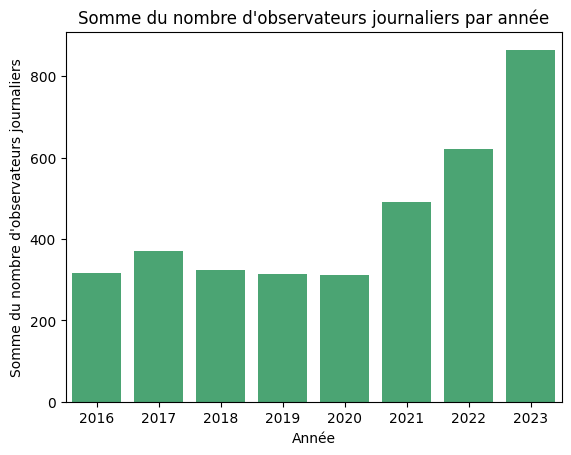

In [60]:
date_observers = data_total[['date_dt', 'Année', 'n_observers']].drop_duplicates()
n_observers_per_year = date_observers.groupby(['Année'])['n_observers'].sum().reset_index()
sns.barplot(data=n_observers_per_year, x='Année', y='n_observers', color='mediumseagreen').set(xlabel ="Année", ylabel = "Somme du nombre d'observateurs journaliers", title ="Somme du nombre d'observateurs journaliers par année")

plt.savefig('../figures/figures_finales_rapport/somme_nb_observateurs_par_annee_15_juil_15_sept.png')

## Richesse spécifique par année, totale et par statut

In [61]:
species_richness_dir1 = data_dir1.groupby('Année')['species'].nunique().reset_index(name='Migration nord-sud')
species_richness_dir2 = data_dir2.groupby('Année')['species'].nunique().reset_index(name='Migration sud-nord')
species_richness_local = data_local.groupby('Année')['species'].nunique().reset_index(name='Local')
species_richness_total = data_total.groupby('Année')['species'].nunique().reset_index(name='Total')

species_richness = species_richness_dir1.merge(species_richness_dir2, on='Année', how='outer').merge(species_richness_local, on='Année', how='outer').merge(species_richness_total, on='Année', how='outer')

species_richness = species_richness.melt(id_vars=['Année'],
                    value_vars=['Total', 'Migration nord-sud', 'Migration sud-nord', 'Local'],
                    var_name='Statut',
                    value_name='Richesse spécifique')

species_richness

,Année,Statut,Richesse spécifique
0,2016,Total,42.0
1,2017,Total,58.0
2,2018,Total,40.0
3,2019,Total,53.0
4,2020,Total,76.0
5,2021,Total,112.0
6,2022,Total,108.0
7,2023,Total,107.0
8,2016,Migration nord-sud,35.0
9,2017,Migration nord-sud,50.0


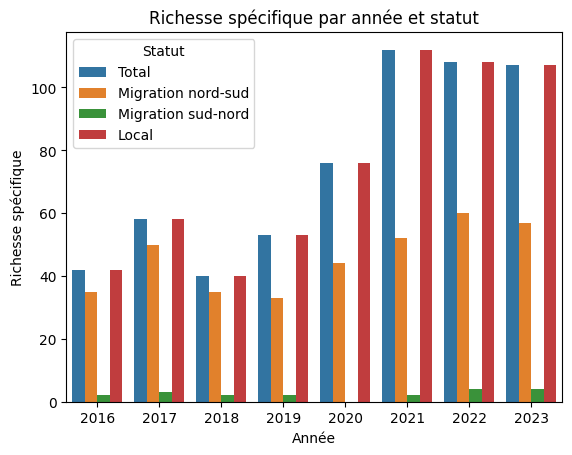

In [62]:
richesse_specifique = sns.barplot(data=species_richness, x='Année', y='Richesse spécifique', hue='Statut').set(xlabel ="Année", ylabel = "Richesse spécifique", title ="Richesse spécifique par année et statut")
richesse_specifique
plt.savefig('../figures/figures_finales_rapport/richesse_specifique_par_an_par_statut_15_juil_15_sept.png')

# Figures top 6

## Effectifs annuels

In [112]:
liste_especes = data_dir1[data_dir1['species'].isin(['Milan noir', 'Bondrée apivore','Cigogne blanche', 'Épervier d’Europe', 'Cigogne noire'])]
effectif_espece_annee = liste_especes.groupby(['species', 'Année'])['direction1'].sum().reset_index()
effectif_espece_annee.rename(columns={'species':'Espèces','year':'Année', 'direction1': 'Effectif total'}, inplace=True)
effectif_espece_annee['Effectif total'] = effectif_espece_annee['Effectif total'] .astype(int)

effectif_espece_annee.to_csv('../figures/figures_finales_rapport/effectif_bondree_cigogne_blanche_noire_milan_noir_epervier_annee_15_juil_15_sept.csv', index=False)

effectif_espece_annee


,Espèces,Année,Effectif total
0,Bondrée apivore,2016,4491
1,Bondrée apivore,2017,4816
2,Bondrée apivore,2018,6174
3,Bondrée apivore,2019,5496
4,Bondrée apivore,2020,5141
5,Bondrée apivore,2021,2631
6,Bondrée apivore,2022,3794
7,Bondrée apivore,2023,5743
8,Cigogne blanche,2016,143
9,Cigogne blanche,2017,98


In [114]:
effectif_milan_royal_toutes_dates = milan_royal.groupby(['species', 'Année'])['direction1'].sum().reset_index()
effectif_milan_royal_toutes_dates.rename(columns={'species':'Espèces','year':'Année', 'direction1': 'Effectif total'}, inplace=True)
effectif_milan_royal_toutes_dates['Effectif total'] = effectif_milan_royal_toutes_dates['Effectif total'] .astype(int)
effectif_milan_royal_toutes_dates

effectif_milan_royal_toutes_dates.to_csv('../figures/figures_finales_rapport/effectif_milan_royal_annee_toutes_dates.csv', index=False)


In [64]:
species_colors = {
    'Bondrée apivore': 'red',
    'Cigogne blanche': 'blue',
    'Cigogne noire': 'green',
    'Milan noir': 'violet',
    'Milan royal': 'orange',
    'Épervier d’Europe' : 'yellow'
}

### Effectif annuel du milan noir entre 2016 et 2023

In [65]:
milan_noir_effectif_par_an = effectif_espece_annee[effectif_espece_annee['Espèces'].isin(['Milan noir'])]
milan_noir_effectif_par_an

,Espèces,Année,Effectif total
24,Milan noir,2016,45042
25,Milan noir,2017,45840
26,Milan noir,2018,47724
27,Milan noir,2019,57768
28,Milan noir,2020,67070
29,Milan noir,2021,58873
30,Milan noir,2022,53338
31,Milan noir,2023,78929


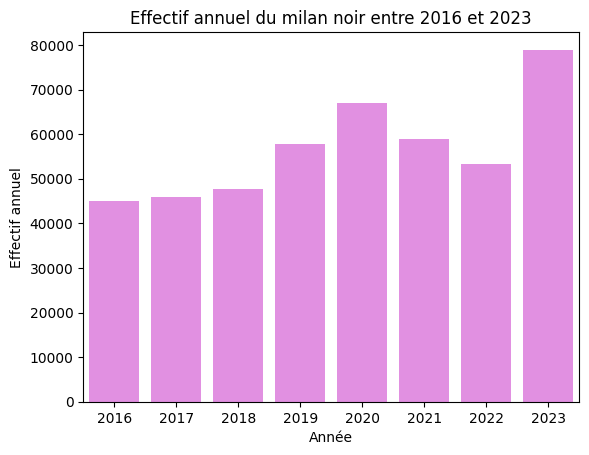

In [109]:
fig, ax = plt.subplots()

sns.barplot(data=milan_noir_effectif_par_an,
            x='Année',
            y='Effectif total',
            hue='Espèces',
            palette=species_colors).set(xlabel ="Année", ylabel = "Effectif annuel");

plt.title("Effectif annuel du milan noir entre 2016 et 2023", fontsize=12);
plt.legend().remove()

plt.savefig('../figures/figures_finales_rapport/somme_effectif_par_an_milan_noir_15_juil_15_sept.png')

###  Effectifs annuels de la bondrée apivore entre 2016 et 2023

In [67]:
bondree_effectif_par_an = effectif_espece_annee[effectif_espece_annee['Espèces'].isin(['Bondrée apivore'])]
bondree_effectif_par_an

,Espèces,Année,Effectif total
0,Bondrée apivore,2016,4491
1,Bondrée apivore,2017,4816
2,Bondrée apivore,2018,6174
3,Bondrée apivore,2019,5496
4,Bondrée apivore,2020,5141
5,Bondrée apivore,2021,2631
6,Bondrée apivore,2022,3794
7,Bondrée apivore,2023,5743


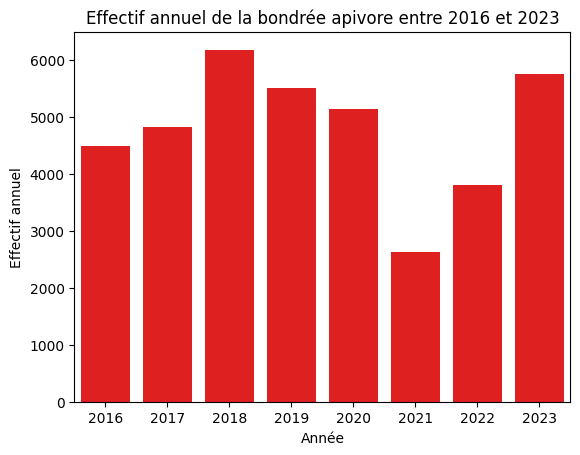

In [108]:
fig, ax = plt.subplots()

sns.barplot(data=bondree_effectif_par_an,
            x='Année',
            y='Effectif total',
            hue='Espèces',
            palette=species_colors).set(xlabel ="Année", ylabel = "Effectif annuel");

plt.title("Effectif annuel de la bondrée apivore entre 2016 et 2023", fontsize=12);
plt.legend().remove()

plt.savefig('../figures/figures_finales_rapport/somme_effectif_par_an_bondree_apivore_15_juil_15_sept.png')

###  Effectifs annuels du milan royal entre 2016 et 2023 (15 juillet - 15 septembre)

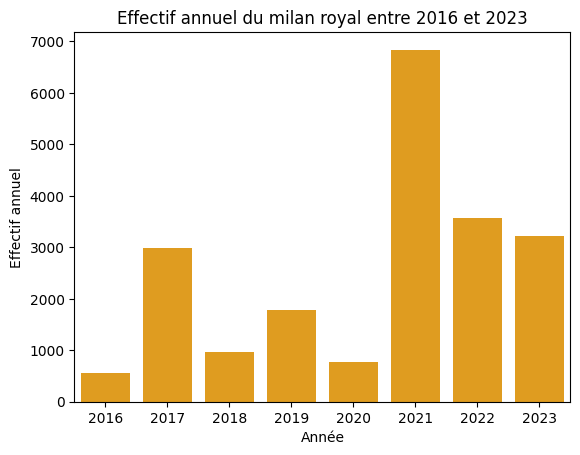

In [110]:
fig, ax = plt.subplots()

sns.barplot(data=effectif_milan_royal_toutes_dates,
            x='Année',
            y='Effectif total',
            hue='Espèces',
            palette=species_colors).set(xlabel ="Année", ylabel = "Effectif annuel");

plt.title("Effectif annuel du milan royal entre 2016 et 2023", fontsize=12);
plt.legend().remove()

plt.savefig('../figures/figures_finales_rapport/somme_effectif_par_an_milan_royal_toutes_dates.png')

### Effectifs annuels de la cigogne blanche, la cigogne noire et l’épervier d’Europe entre 2016 et 2023

In [71]:
liste_especes_CB_EE_CN= effectif_espece_annee[effectif_espece_annee['Espèces'].isin(['Cigogne blanche', 'Épervier d’Europe', 'Cigogne noire'])]
liste_especes_CB_EE_CN

,Espèces,Année,Effectif total
8,Cigogne blanche,2016,143
9,Cigogne blanche,2017,98
10,Cigogne blanche,2018,285
11,Cigogne blanche,2019,112
12,Cigogne blanche,2020,271
13,Cigogne blanche,2021,284
14,Cigogne blanche,2022,198
15,Cigogne blanche,2023,301
16,Cigogne noire,2016,94
17,Cigogne noire,2017,138


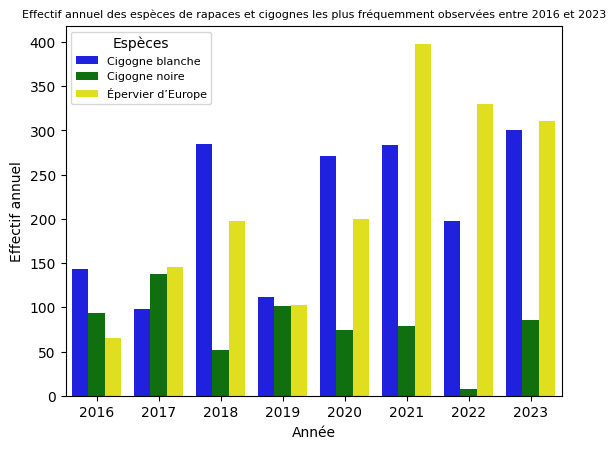

In [72]:
fig, ax = plt.subplots()

sns.barplot(data=liste_especes_CB_EE_CN,
            x='Année',
            y='Effectif total',
            hue='Espèces',
            palette=species_colors).set(xlabel ="Année", ylabel = "Effectif annuel");

plt.title("Effectif annuel des espèces de rapaces et cigognes les plus fréquemment observées entre 2016 et 2023", fontsize=8);
plt.legend(title='Espèces', prop={'size': 8})

plt.savefig('../figures/figures_finales_rapport/somme_effectif_par_an_cigogne_blanche_noire_epervier_15_juil_15_sept.png')

## Phénologie de migration

In [81]:
# Consistent color palette for each year
year_colors = {
    2016: '#e41a1c',
    2017: '#377eb8',
    2018: '#4daf4a',
    2019: '#984ea3',
    2020: '#ff7f00',
    2021: '#ffff33',
    2022: '#a65628',
    2023: '#f781bf'
}

### Milan noir

In [73]:
milan_noir = data_dir1[data_dir1['species'].isin(['Milan noir'])]
milan_noir

,Année,date_dt,species,day_month,direction1
3,2016,2016-07-15,Milan noir,15-juil,433.0
9301,2023,2023-07-15,Milan noir,15-juil,104.0
745,2017,2017-07-15,Milan noir,15-juil,1529.0
6824,2022,2022-07-15,Milan noir,15-juil,425.0
4630,2021,2021-07-15,Milan noir,15-juil,11.0
...,...,...,...,...,...
4277,2020,2020-09-15,Milan noir,15-sept,28.0
2319,2018,2018-09-15,Milan noir,15-sept,16.0
8373,2022,2022-09-15,Milan noir,15-sept,2.0
669,2016,2016-09-15,Milan noir,15-sept,2.0


/var/folders/p7/90k2qrqs4fvbt30f5t6x0glc0000gn/T/ipykernel_44505/286154579.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  milan_noir_x = milan_noir_x[data_dir1['Année'].isin([year])]
/var/folders/p7/90k2qrqs4fvbt30f5t6x0glc0000gn/T/ipykernel_44505/286154579.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  milan_noir_x = milan_noir_x[data_dir1['Année'].isin([year])]
/var/folders/p7/90k2qrqs4fvbt30f5t6x0glc0000gn/T/ipykernel_44505/286154579.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  milan_noir_x = milan_noir_x[data_dir1['Année'].isin([year])]
/var/folders/p7/90k2qrqs4fvbt30f5t6x0glc0000gn/T/ipykernel_44505/286154579.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  milan_noir_x = milan_noir_x[data_dir1['Année'].isin([year])]
/var/folders/p7/90k2qrqs4fvbt30f5t6x0glc0000gn/T/ipykernel_44505/286154579.py:11: UserWarning: Boolean Series key wi

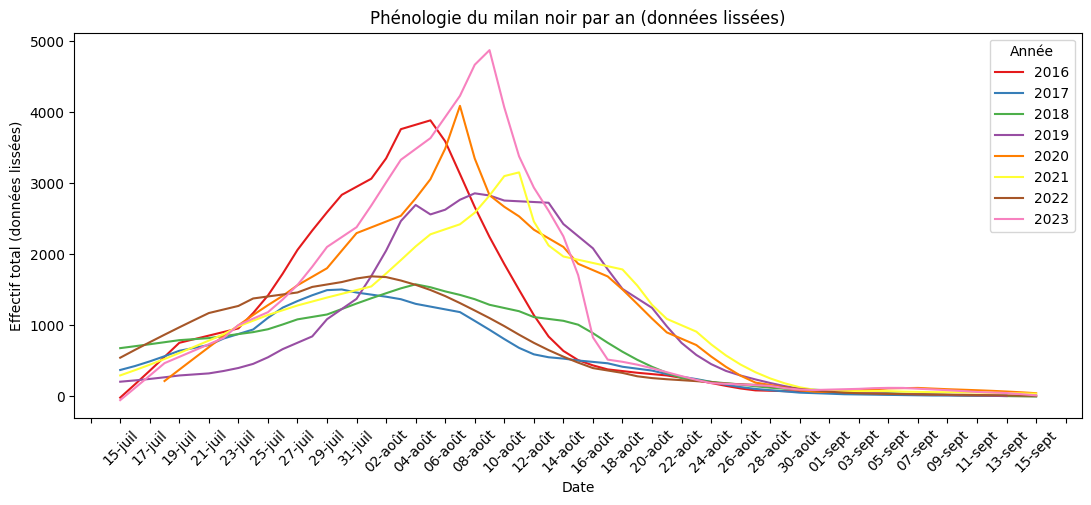

In [88]:
# LISSEES
# Initialize the figure
plt.figure(figsize=(13, 5))

years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

# Loop through each year and plot the data
for year in years:

    milan_noir_x = data_dir1[data_dir1['species'].isin(['Milan noir'])]
    milan_noir_x = milan_noir_x[data_dir1['Année'].isin([year])]

    milan_noir_x['day_float'] = np.linspace(1, len(milan_noir_x), num=len(milan_noir_x))

    x = np.array(milan_noir_x.day_float)
    y = np.array(milan_noir_x.direction1)
    z = sm.nonparametric.lowess(y, x, frac=1./3, it=3)

    # Plot the original data and the smoothed data
    #sns.lineplot(x=milan_noir['day_month'], y=y, label=f'Données originales {year}',  linestyle='--')
    sns.lineplot(x=milan_noir_x['day_month'],
                 y=z[:, 1],
                 label=year,
                 color=year_colors[year]
                 )

# Add labels and a title
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(2))
plt.ylabel('Effectif total (données lissées)')
plt.title('Phénologie du milan noir par an (données lissées)')
plt.legend(title="Année")

# Display the plot
plt.savefig('../figures/figures_finales_rapport/phenologie_donnees_lissees_milan_noir_15_juil_15_sept.png')

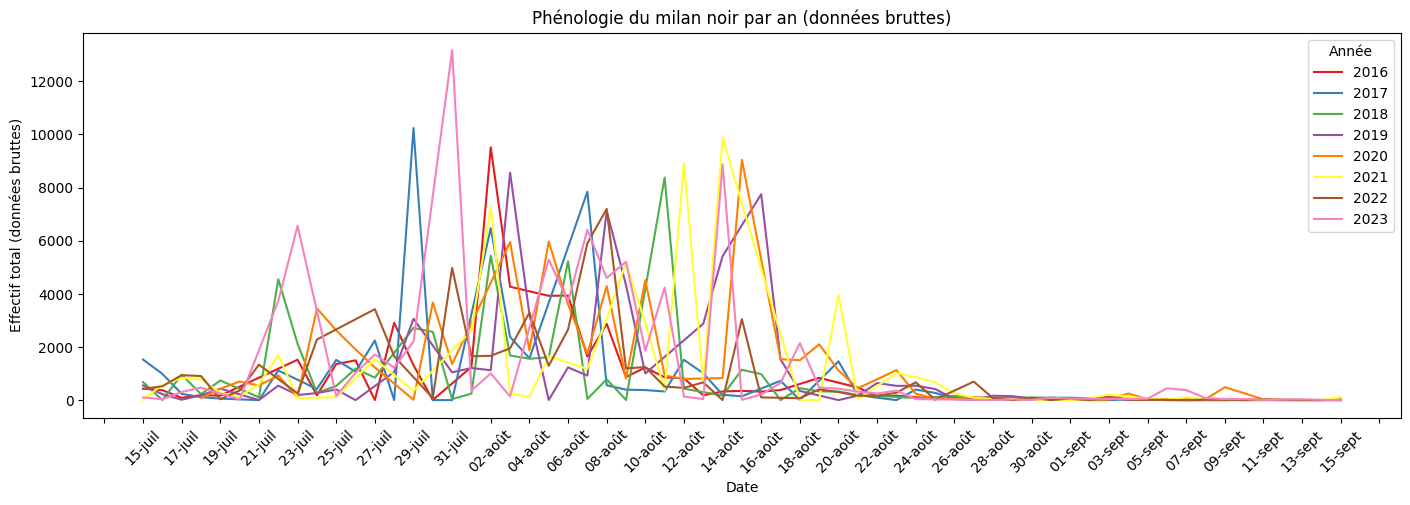

In [85]:
# BRUTTES
# Initialize the figure
plt.figure(figsize=(17, 5))

milan_noir_2020_to_2023 = milan_noir[milan_noir['Année'].isin([2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])]

milan_noir_plot = sns.lineplot(data=milan_noir_2020_to_2023,
                               x='day_month',
                               y='direction1',
                               hue='Année',
                               palette=year_colors
                               );
plt.xticks(rotation=45);
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(2))
milan_noir_plot.set(xlabel ="Date",
                    ylabel = "Effectif total (données bruttes)",
                    title ="Phénologie du milan noir par an (données bruttes)");

#Save image to folder
fig = milan_noir_plot.get_figure()
plt.savefig('../figures/figures_finales_rapport/phenologie_donnees_bruttes_milan_noir_15_juil_15_sept.png')

### Milan royal

/var/folders/p7/90k2qrqs4fvbt30f5t6x0glc0000gn/T/ipykernel_44505/914426890.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  milan_royal_x['day_float'] = np.linspace(1, len(milan_royal_x), num=len(milan_royal_x))
/var/folders/p7/90k2qrqs4fvbt30f5t6x0glc0000gn/T/ipykernel_44505/914426890.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  milan_royal_x['day_float'] = np.linspace(1, len(milan_royal_x), num=len(milan_royal_x))
/var/folders/p7/90k2qrqs4fvbt30f5t6x0glc0000gn/T/ipykernel_44505/914426890.py:12

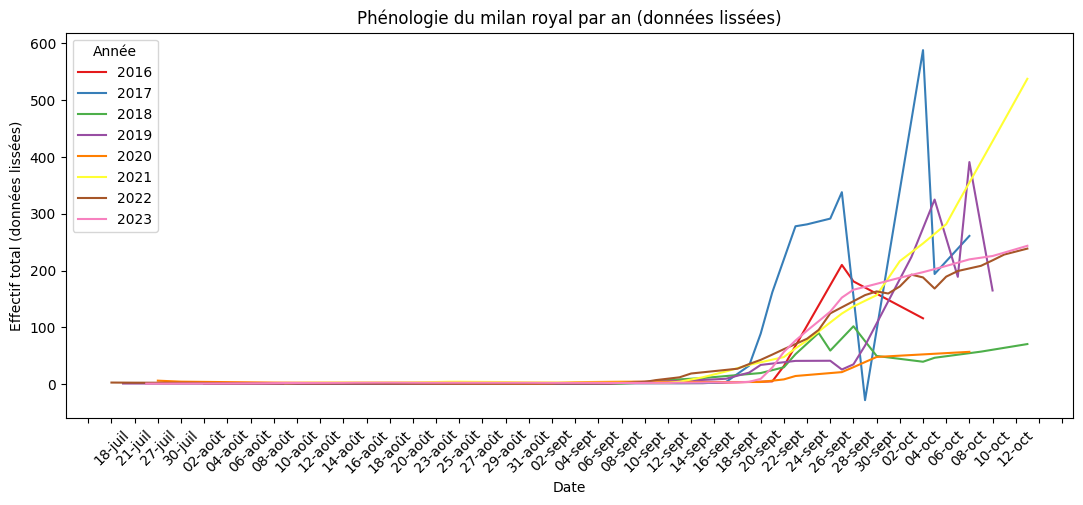

In [90]:
# LISSEES
# Initialize the figure
plt.figure(figsize=(13, 5))

years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

# Loop through each year and plot the data
for year in years:

    milan_royal_x = milan_royal[milan_royal['Année'].isin([year])]

    milan_royal_x['day_float'] = np.linspace(1, len(milan_royal_x), num=len(milan_royal_x))

    x = np.array(milan_royal_x.day_float)
    y = np.array(milan_royal_x.direction1)
    z = sm.nonparametric.lowess(y, x, frac=1./3, it=3)

    # Plot the original data and the smoothed data
    #sns.lineplot(x=milan_noir['day_month'], y=y, label=f'Données originales {year}',  linestyle='--')
    sns.lineplot(x=milan_royal_x['day_month'],
                 y=z[:, 1],
                 label=year,
                 color=year_colors[year]
                 )

# Add labels and a title
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(2))
plt.ylabel('Effectif total (données lissées)')
plt.title('Phénologie du milan royal par an (données lissées)')
plt.legend(title="Année")

# Display the plot
plt.savefig('../figures/figures_finales_rapport/phenologie_donnees_lissees_milan_royal_toutes_dates.png')

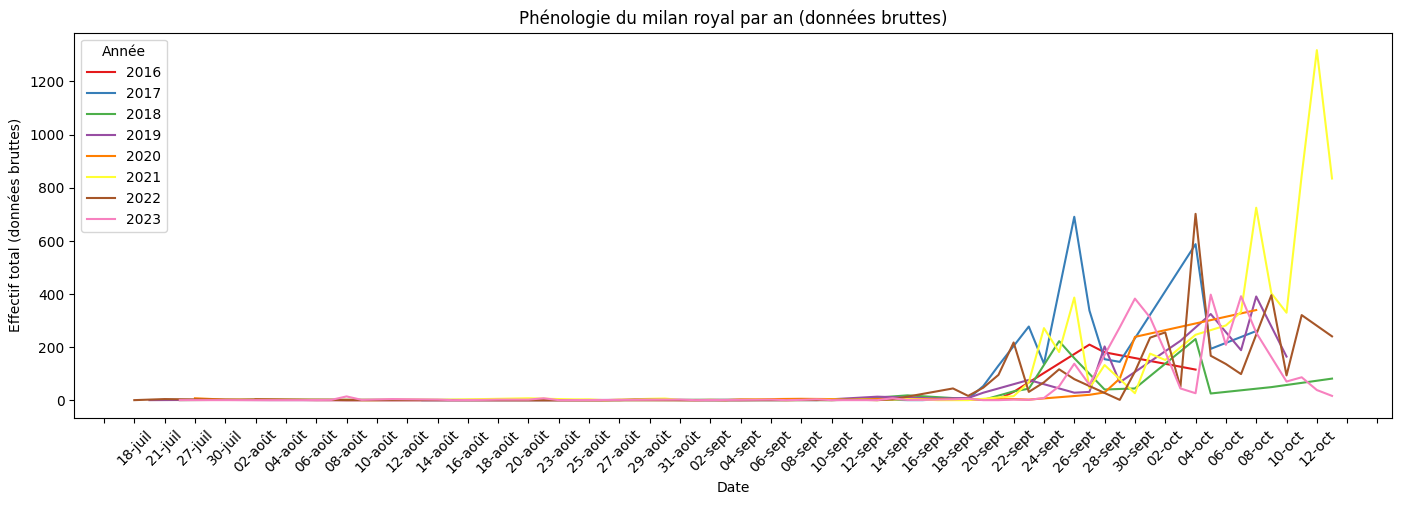

In [106]:
# BRUTTES
# Initialize the figure
plt.figure(figsize=(17, 5))

milan_royal_2020_to_2023 = milan_royal[milan_royal['Année'].isin([2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])]

milan_royal_plot = sns.lineplot(data=milan_royal_2020_to_2023,
                               x='day_month',
                               y='direction1',
                               hue='Année',
                               palette=year_colors
                               );
plt.xticks(rotation=45);
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(2))
milan_royal_plot.set(xlabel ="Date",
                    ylabel = "Effectif total (données bruttes)",
                    title ="Phénologie du milan royal par an (données bruttes)");

#Save image to folder
fig = milan_royal_plot.get_figure()
plt.savefig('../figures/figures_finales_rapport/phenologie_donnees_bruttes_milan_royal_toutes_dates.png')

### Bondrée apivore

In [94]:
bondree = data_dir1[data_dir1['species'].isin(['Bondrée apivore'])]
bondree

,Année,date_dt,species,day_month,direction1
6858,2022,2022-07-17,Bondrée apivore,17-juil,1.0
9357,2023,2023-07-18,Bondrée apivore,18-juil,1.0
37,2016,2016-07-20,Bondrée apivore,20-juil,1.0
6917,2022,2022-07-20,Bondrée apivore,20-juil,2.0
6941,2022,2022-07-21,Bondrée apivore,21-juil,3.0
...,...,...,...,...,...
4267,2020,2020-09-15,Bondrée apivore,15-sept,2.0
2309,2018,2018-09-15,Bondrée apivore,15-sept,46.0
663,2016,2016-09-15,Bondrée apivore,15-sept,9.0
8362,2022,2022-09-15,Bondrée apivore,15-sept,45.0


/var/folders/p7/90k2qrqs4fvbt30f5t6x0glc0000gn/T/ipykernel_44505/2690920617.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bondree_x['day_float'] = np.linspace(1, len(bondree_x), num=len(bondree_x))
/var/folders/p7/90k2qrqs4fvbt30f5t6x0glc0000gn/T/ipykernel_44505/2690920617.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bondree_x['day_float'] = np.linspace(1, len(bondree_x), num=len(bondree_x))
/var/folders/p7/90k2qrqs4fvbt30f5t6x0glc0000gn/T/ipykernel_44505/2690920617.py:12: SettingWithCopyWarn

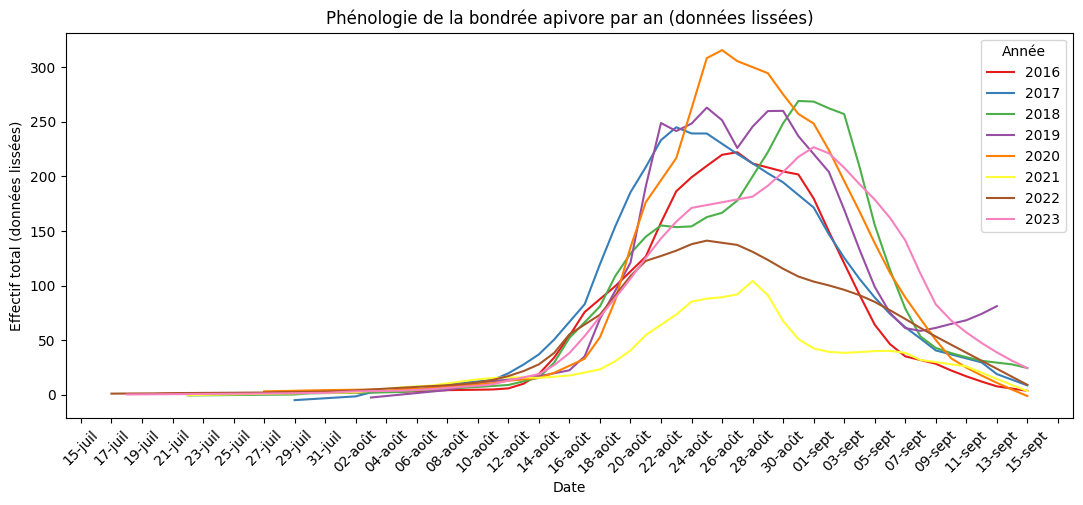

In [95]:
# LISSEES
# Initialize the figure
plt.figure(figsize=(13, 5))

years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

# Loop through each year and plot the data
for year in years:

    bondree_x = bondree[bondree['Année'].isin([year])]

    bondree_x['day_float'] = np.linspace(1, len(bondree_x), num=len(bondree_x))

    x = np.array(bondree_x.day_float)
    y = np.array(bondree_x.direction1)
    z = sm.nonparametric.lowess(y, x, frac=1./3, it=3)

    # Plot the original data and the smoothed data
    #sns.lineplot(x=milan_noir['day_month'], y=y, label=f'Données originales {year}',  linestyle='--')
    sns.lineplot(x=bondree_x['day_month'],
                 y=z[:, 1],
                 label=year,
                 color=year_colors[year]
                 )


# Add labels and a title
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(2))
plt.ylabel('Effectif total (données lissées)')
plt.title('Phénologie de la bondrée apivore par an (données lissées)')
plt.legend(title='Année')

# Display the plot
plt.savefig('../figures/figures_finales_rapport/phenologie_donnees_lissees_bondree_apivore_15_juil_15_sept.png')

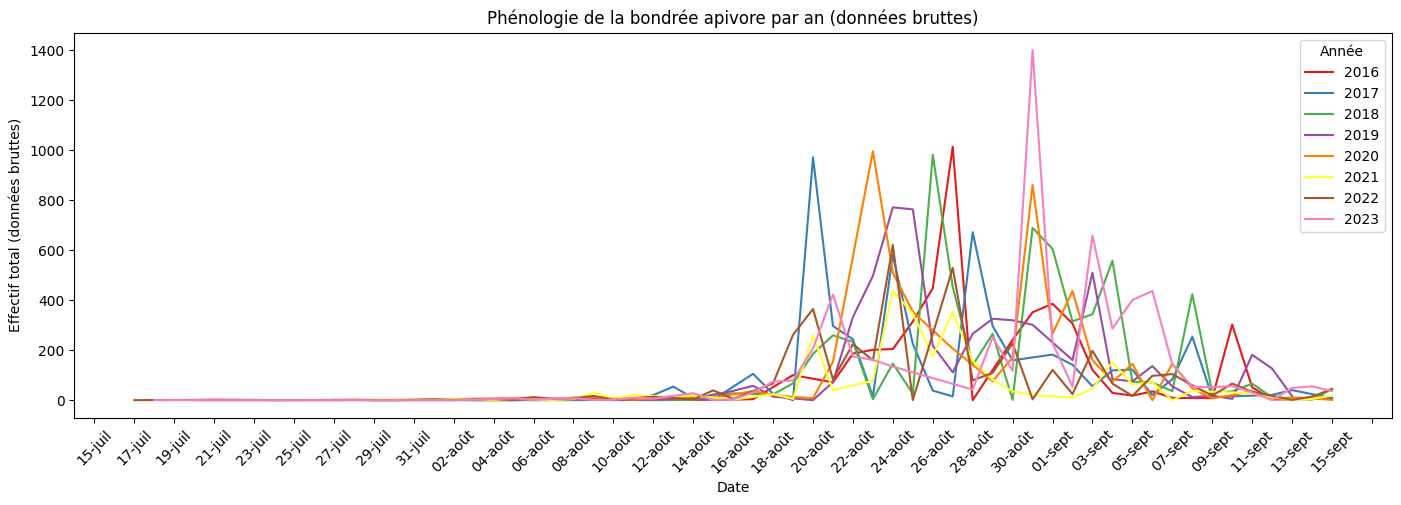

In [96]:
# BRUTTES
# Initialize the figure
plt.figure(figsize=(17, 5))

bondree_2020_to_2023 = bondree[bondree['Année'].isin([2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])]

bondree_plot = sns.lineplot(data=bondree_2020_to_2023, x='day_month', y='direction1', hue='Année', palette=year_colors);
plt.xticks(rotation=45);
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(2))
bondree_plot.set(xlabel ="Date",
                    ylabel = "Effectif total (données bruttes)",
                    title ="Phénologie de la bondrée apivore par an (données bruttes)");

#Save image to folder
fig = bondree_plot.get_figure()
plt.savefig('../figures/figures_finales_rapport/phenologie_donnees_bruttes_bondree_apivore_15_juil_15_sept.png')

### Epervier d'europe

In [97]:
epervier = data_dir1[data_dir1['species'].isin(['Épervier d’Europe'])]
epervier

,Année,date_dt,species,day_month,direction1
1838,2018,2018-07-26,Épervier d’Europe,26-juil,1.0
1852,2018,2018-07-29,Épervier d’Europe,29-juil,1.0
7144,2022,2022-08-01,Épervier d’Europe,01-août,2.0
7178,2022,2022-08-02,Épervier d’Europe,02-août,1.0
902,2017,2017-08-02,Épervier d’Europe,02-août,1.0
...,...,...,...,...,...
1508,2017,2017-09-15,Épervier d’Europe,15-sept,3.0
672,2016,2016-09-15,Épervier d’Europe,15-sept,3.0
5994,2021,2021-09-15,Épervier d’Europe,15-sept,27.0
8382,2022,2022-09-15,Épervier d’Europe,15-sept,12.0


/var/folders/p7/90k2qrqs4fvbt30f5t6x0glc0000gn/T/ipykernel_44505/3746869031.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  epervier_x['day_float'] = np.linspace(1, len(epervier_x), num=len(epervier_x))
/var/folders/p7/90k2qrqs4fvbt30f5t6x0glc0000gn/T/ipykernel_44505/3746869031.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  epervier_x['day_float'] = np.linspace(1, len(epervier_x), num=len(epervier_x))
/var/folders/p7/90k2qrqs4fvbt30f5t6x0glc0000gn/T/ipykernel_44505/3746869031.py:12: SettingWithCo

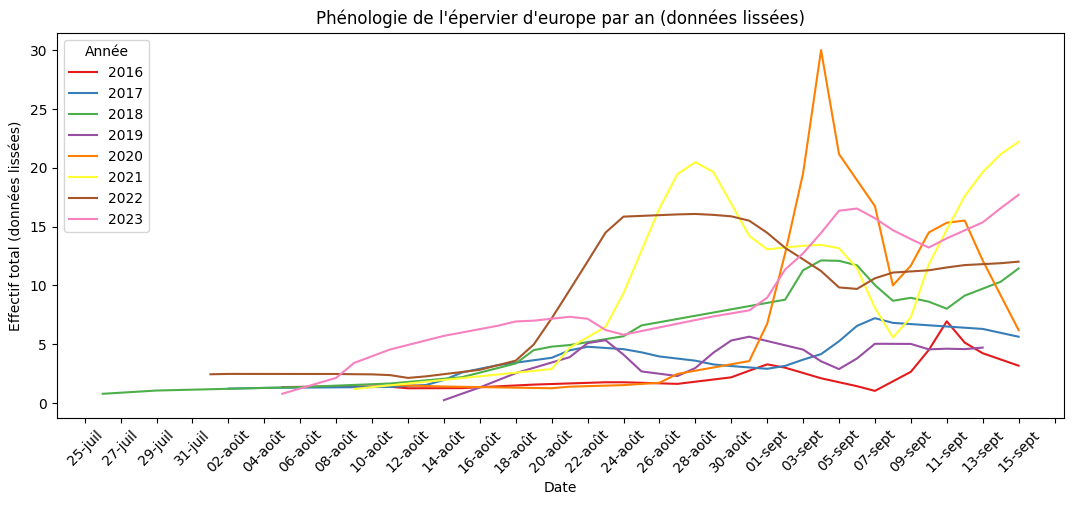

In [98]:
# LISSEES
# Initialize the figure
plt.figure(figsize=(13, 5))

years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

# Loop through each year and plot the data
for year in years:

    epervier_x = epervier[epervier['Année'].isin([year])]

    epervier_x['day_float'] = np.linspace(1, len(epervier_x), num=len(epervier_x))

    x = np.array(epervier_x.day_float)
    y = np.array(epervier_x.direction1)
    z = sm.nonparametric.lowess(y, x, frac=1./3, it=3)

    # Plot the original data and the smoothed data
    #sns.lineplot(x=milan_noir['day_month'], y=y, label=f'Données originales {year}',  linestyle='--')
    sns.lineplot(x=epervier_x['day_month'],
                 y=z[:, 1],
                 label=year,
                 color=year_colors[year]
                 )



# Add labels and a title
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(2))
plt.ylabel('Effectif total (données lissées)')
plt.title('''Phénologie de l'épervier d'europe par an (données lissées)''')
plt.legend(title='Année')

# Display the plot
plt.savefig('../figures/figures_finales_rapport/phenologie_donnees_lissees_epervier_europe_15_juil_15_sept.png')

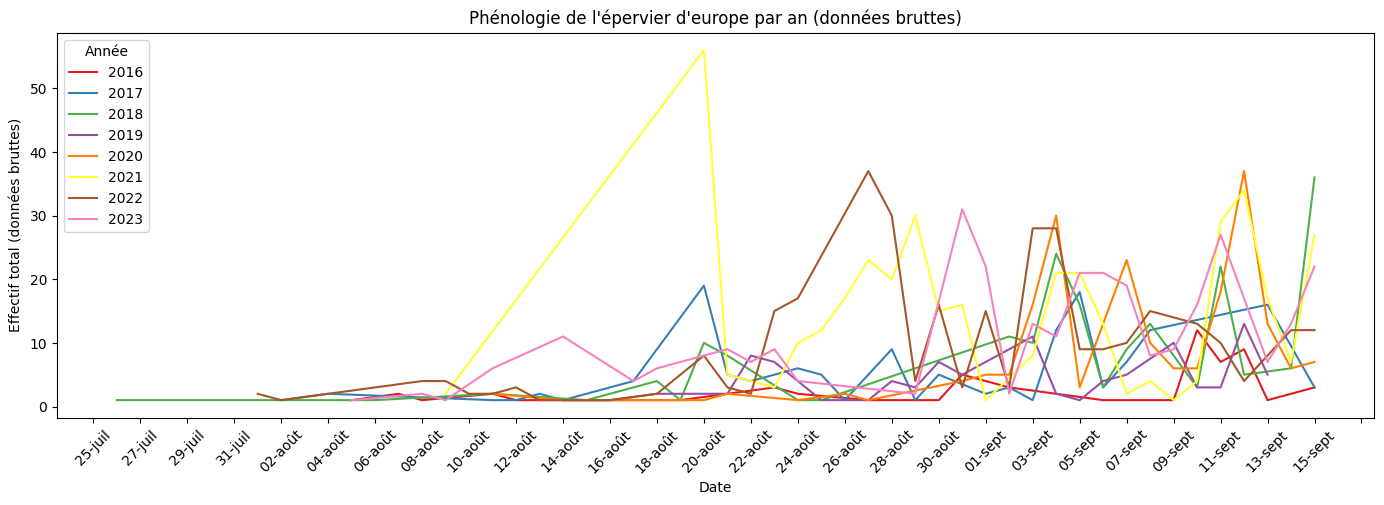

In [99]:
# BRUTTES
# Initialize the figure
plt.figure(figsize=(17, 5))

epervier_2020_to_2023 = epervier[epervier['Année'].isin([2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])]

epervier_plot = sns.lineplot(data=epervier_2020_to_2023, x='day_month', y='direction1', hue='Année', palette=year_colors);
plt.xticks(rotation=45);
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(2))
epervier_plot.set(xlabel ="Date",
                    ylabel = "Effectif total (données bruttes)",
                    title ="Phénologie de l'épervier d'europe par an (données bruttes)");

#Save image to folder
fig = epervier_plot.get_figure()
plt.savefig('../figures/figures_finales_rapport/phenologie_donnees_bruttes_epervier_europe_15_juil_15_sept.png')

### Cigogne noire

In [100]:
cigogne_noire = data_dir1[data_dir1['species'].isin(['Cigogne noire'])]
cigogne_noire

,Année,date_dt,species,day_month,direction1
9,2016,2016-07-16,Cigogne noire,16-juil,1.0
16,2016,2016-07-17,Cigogne noire,17-juil,1.0
796,2017,2017-07-22,Cigogne noire,22-juil,1.0
45,2016,2016-07-23,Cigogne noire,23-juil,1.0
61,2016,2016-07-25,Cigogne noire,25-juil,1.0
...,...,...,...,...,...
4247,2020,2020-09-14,Cigogne noire,14-sept,1.0
10988,2023,2023-09-14,Cigogne noire,14-sept,5.0
11031,2023,2023-09-15,Cigogne noire,15-sept,4.0
2314,2018,2018-09-15,Cigogne noire,15-sept,7.0


/var/folders/p7/90k2qrqs4fvbt30f5t6x0glc0000gn/T/ipykernel_44505/3857186364.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cigogne_noire_x['day_float'] = np.linspace(1, len(cigogne_noire_x), num=len(cigogne_noire_x))
/var/folders/p7/90k2qrqs4fvbt30f5t6x0glc0000gn/T/ipykernel_44505/3857186364.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cigogne_noire_x['day_float'] = np.linspace(1, len(cigogne_noire_x), num=len(cigogne_noire_x))
/var/folders/p7/90k2qrqs4fvbt30f5t6x0glc0000gn/T/ipykernel_44505/3

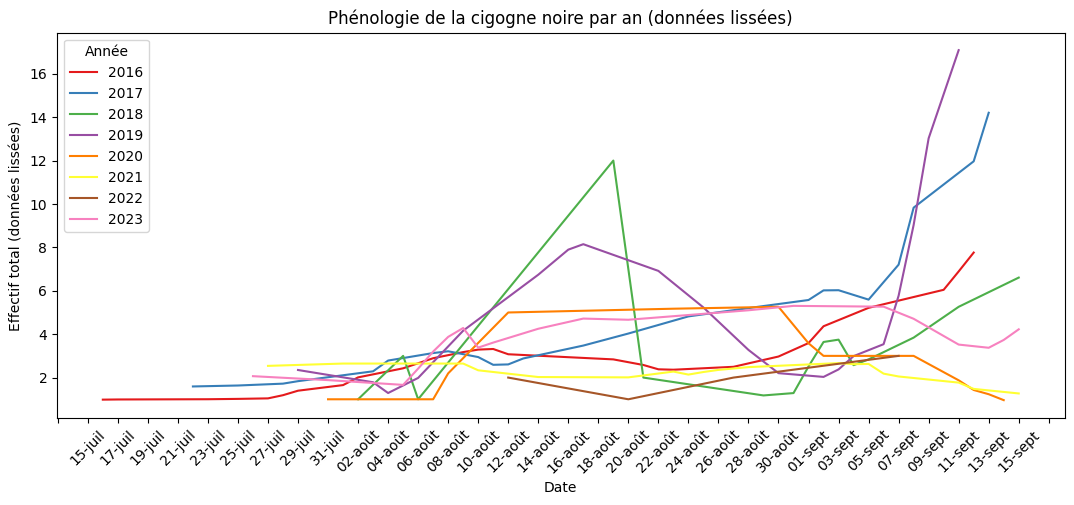

In [101]:
# LISSEES
# Initialize the figure
plt.figure(figsize=(13, 5))

years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

# Loop through each year and plot the data
for year in years:

    cigogne_noire_x = cigogne_noire[cigogne_noire['Année'].isin([year])]

    cigogne_noire_x['day_float'] = np.linspace(1, len(cigogne_noire_x), num=len(cigogne_noire_x))

    x = np.array(cigogne_noire_x.day_float)
    y = np.array(cigogne_noire_x.direction1)
    z = sm.nonparametric.lowess(y, x, frac=1./3, it=3)

    # Plot the original data and the smoothed data
    #sns.lineplot(x=milan_noir['day_month'], y=y, label=f'Données originales {year}',  linestyle='--')
    sns.lineplot(x=cigogne_noire_x['day_month'],
                 y=z[:, 1],
                 label=year,
                 color=year_colors[year]
                 )


# Add labels and a title
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(2))
plt.ylabel('Effectif total (données lissées)')
plt.title('''Phénologie de la cigogne noire par an (données lissées)''')
plt.legend(title='Année')

# Display the plot
plt.savefig('../figures/figures_finales_rapport/phenologie_donnees_lissees_cigogne_noire_15_juil_15_sept.png')

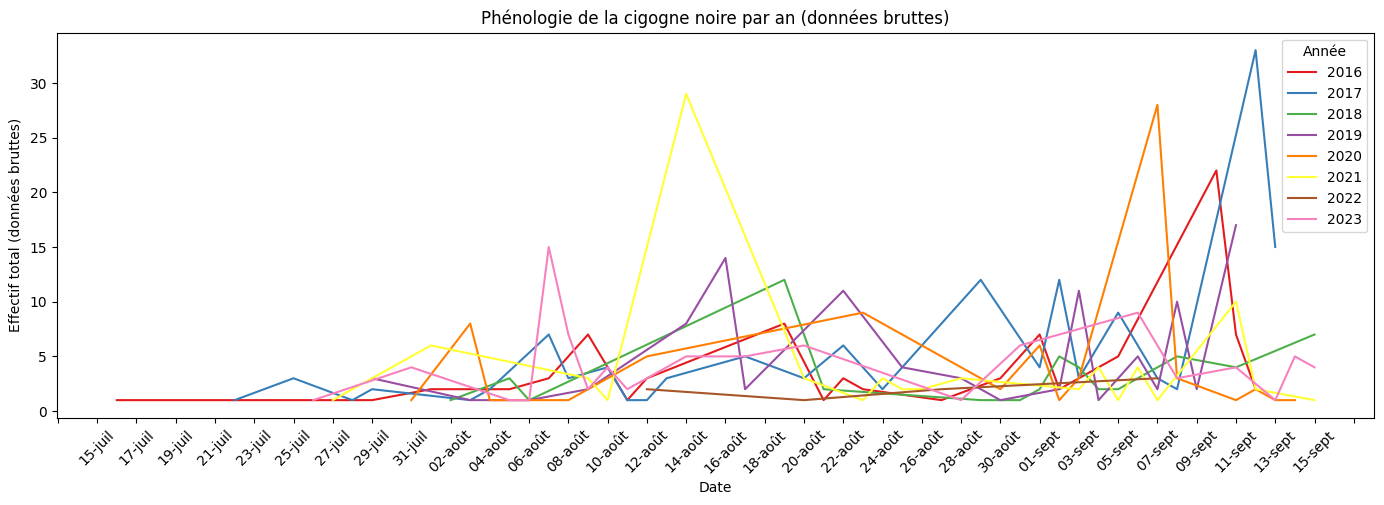

In [102]:
# BRUTTES
# Initialize the figure
plt.figure(figsize=(17, 5))

cigogne_noire_2020_to_2023 = cigogne_noire[cigogne_noire['Année'].isin([2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])]

cigogne_noire_plot = sns.lineplot(data=cigogne_noire_2020_to_2023, x='day_month', y='direction1', hue='Année', palette=year_colors);
plt.xticks(rotation=45);
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(2))
cigogne_noire_plot.set(xlabel ="Date",
                    ylabel = "Effectif total (données bruttes)",
                    title ="Phénologie de la cigogne noire par an (données bruttes)");

#Save image to folder
fig = cigogne_noire_plot.get_figure()
plt.savefig('../figures/figures_finales_rapport/phenologie_donnees_bruttes_cigogne_noire_15_juil_15_sept.png')

### Cigogne blanche

In [103]:
cigogne_blanche = data_dir1[data_dir1['species'].isin(['Cigogne blanche'])]
cigogne_blanche

,Année,date_dt,species,day_month,direction1
739,2017,2017-07-15,Cigogne blanche,15-juil,1.0
9639,2023,2023-07-31,Cigogne blanche,31-juil,104.0
1890,2018,2018-08-05,Cigogne blanche,05-août,1.0
9819,2023,2023-08-07,Cigogne blanche,07-août,133.0
7316,2022,2022-08-08,Cigogne blanche,08-août,122.0
9929,2023,2023-08-10,Cigogne blanche,10-août,55.0
9951,2023,2023-08-11,Cigogne blanche,11-août,8.0
231,2016,2016-08-11,Cigogne blanche,11-août,38.0
5062,2021,2021-08-12,Cigogne blanche,12-août,8.0
273,2016,2016-08-14,Cigogne blanche,14-août,33.0


/var/folders/p7/90k2qrqs4fvbt30f5t6x0glc0000gn/T/ipykernel_44505/245232762.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cigogne_blanche_x['day_float'] = np.linspace(1, len(cigogne_blanche_x), num=len(cigogne_blanche_x))
/var/folders/p7/90k2qrqs4fvbt30f5t6x0glc0000gn/T/ipykernel_44505/245232762.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cigogne_blanche_x['day_float'] = np.linspace(1, len(cigogne_blanche_x), num=len(cigogne_blanche_x))
/var/folders/p7/90k2qrqs4fvbt30f5t6x0glc0000gn/T/ipykern

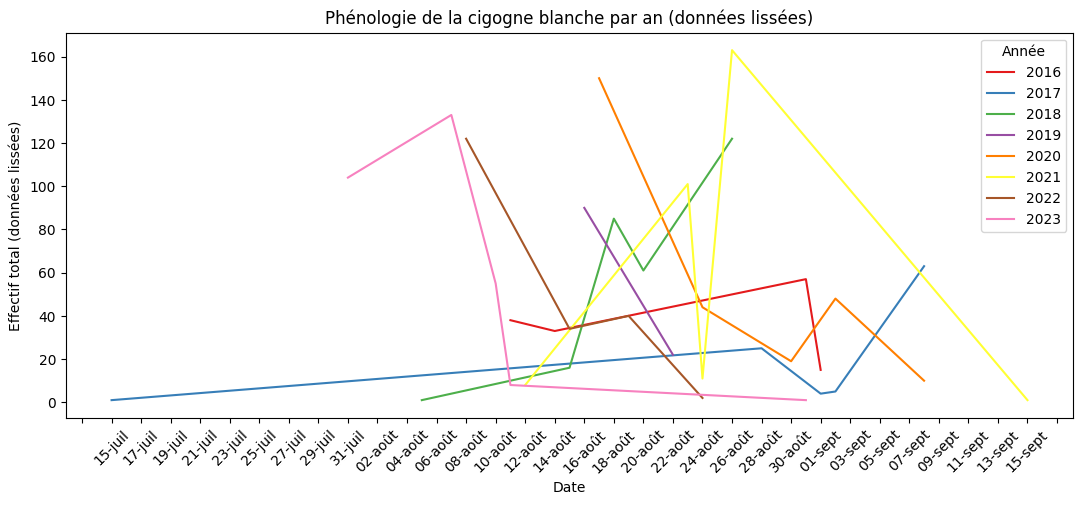

In [104]:
# LISSEES
# Initialize the figure
plt.figure(figsize=(13, 5))

years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

# Loop through each year and plot the data
for year in years:

    cigogne_blanche_x = cigogne_blanche[cigogne_blanche['Année'].isin([year])]

    cigogne_blanche_x['day_float'] = np.linspace(1, len(cigogne_blanche_x), num=len(cigogne_blanche_x))

    x = np.array(cigogne_blanche_x.day_float)
    y = np.array(cigogne_blanche_x.direction1)
    z = sm.nonparametric.lowess(y, x, frac=1./3, it=3)

    # Plot the original data and the smoothed data
    #sns.lineplot(x=milan_noir['day_month'], y=y, label=f'Données originales {year}',  linestyle='--')
    sns.lineplot(x=cigogne_blanche_x['day_month'],
                 y=z[:, 1],
                 label=year,
                 color=year_colors[year]
                 )

# Add labels and a title
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(2))
plt.ylabel('Effectif total (données lissées)')
plt.title('''Phénologie de la cigogne blanche par an (données lissées)''')
plt.legend(title='Année')

# Display the plot
plt.savefig('../figures/figures_finales_rapport/phenologie_donnees_lissees_cigogne_blanche_15_juil_15_sept.png')

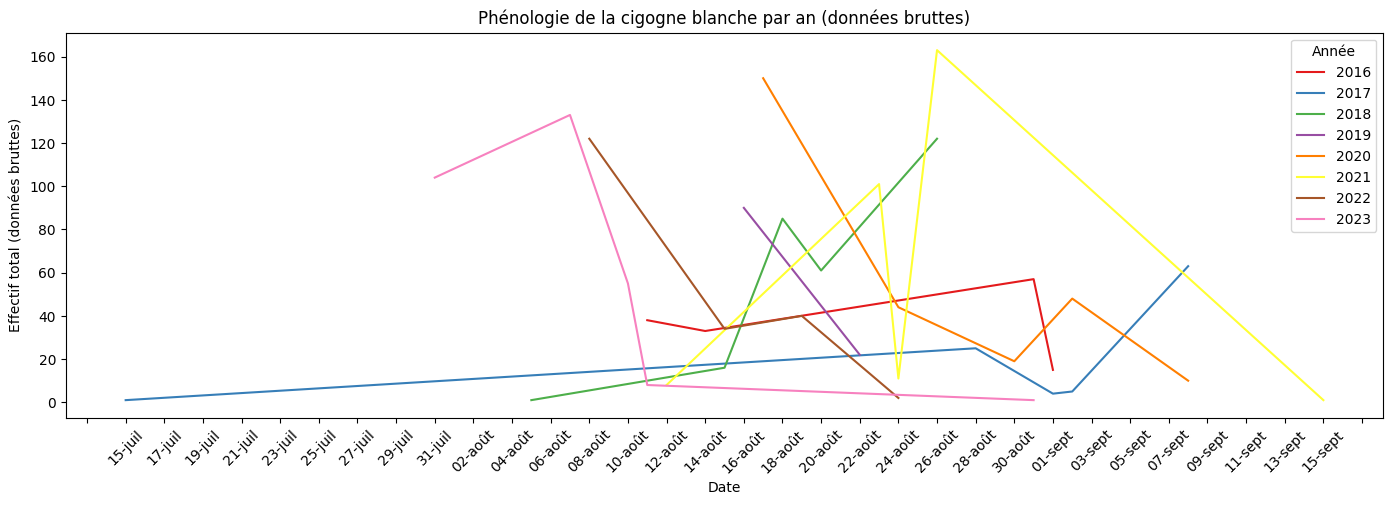

In [105]:
# BRUTTES
# Initialize the figure
plt.figure(figsize=(17, 5))

cigogne_blanche_2020_to_2023 = cigogne_blanche[cigogne_blanche['Année'].isin([2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])]

cigogne_blanche_plot = sns.lineplot(data=cigogne_blanche_2020_to_2023, x='day_month', y='direction1', hue='Année', palette=year_colors);
plt.xticks(rotation=45);
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(2))
cigogne_blanche_plot.set(xlabel ="Date",
                    ylabel = "Effectif total (données bruttes)",
                    title ="Phénologie de la cigogne blanche par an (données bruttes)");

#Save image to folder
fig = cigogne_blanche_plot.get_figure()
plt.savefig('../figures/figures_finales_rapport/phenologie_donnees_bruttes_cigogne_blanche_15_juil_15_sept.png')

## Classe d'âge

In [115]:
data_hour_2023 = data_hour[data_hour['Année'].isin([2023])]

In [116]:
data_hour_age_2023 = data_hour_2023[['date_dt', 'species', 'age', 'direction1']]

### Milan noir

In [120]:
milan_noir_hour_age_2023 = data_hour_age_2023[data_hour_age_2023['species'].isin(['Milan noir'])] # only milan noir

# I = sup 1 an
# A = adult
# 1 = premiere annee
# J = juvenile
# remove deuxieme annee

milan_noir_hour_age_2023.fillna('indéterminé', inplace = True) # fill NA with 'indetermine'
milan_noir_hour_age_2023.replace('I', 'sup 1 an', inplace=True)
milan_noir_hour_age_2023.replace('A', 'adulte', inplace=True)
milan_noir_hour_age_2023.replace('1', 'première année', inplace=True)
milan_noir_hour_age_2023.replace('J', 'juvénile', inplace=True)
milan_noir_hour_age_2023 = milan_noir_hour_age_2023.loc[milan_noir_hour_age_2023['age'] != '2']

milan_noir_hour_age_2023.age.unique()

/var/folders/p7/90k2qrqs4fvbt30f5t6x0glc0000gn/T/ipykernel_44505/2755831542.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  milan_noir_hour_age_2023.fillna('indéterminé', inplace = True) # fill NA with 'indetermine'
/var/folders/p7/90k2qrqs4fvbt30f5t6x0glc0000gn/T/ipykernel_44505/2755831542.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  milan_noir_hour_age_2023.replace('I', 'sup 1 an', inplace=True)
/var/folders/p7/90k2qrqs4fvbt30f5t6x0glc0000gn/T/ipykernel_44505/2755831542.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: 

array(['indéterminé', 'sup 1 an', 'première année', 'adulte'],
      dtype=object)

In [118]:
n_obs_age_milan_noir_NA = milan_noir_hour_age_2023.groupby(['age'])['direction1'].sum().reset_index()

n_obs_age_milan_noir_sans_NA = milan_noir_hour_age_2023.loc[milan_noir_hour_age_2023['age'] != 'indéterminé']
n_obs_age_milan_noir_sans_NA = n_obs_age_milan_noir_sans_NA.groupby(['age'])['direction1'].sum().reset_index()
#n_obs_age_milan_noir_NA = n_obs_age_milan_noir_NA.loc[n_obs_age_milan_noir_NA['age'] != 'juvénile']

n_obs_age_milan_noir_NA

,age,direction1
0,adulte,7
1,indéterminé,42747
2,première année,3692
3,sup 1 an,8261


<Figure size 1000x500 with 0 Axes>

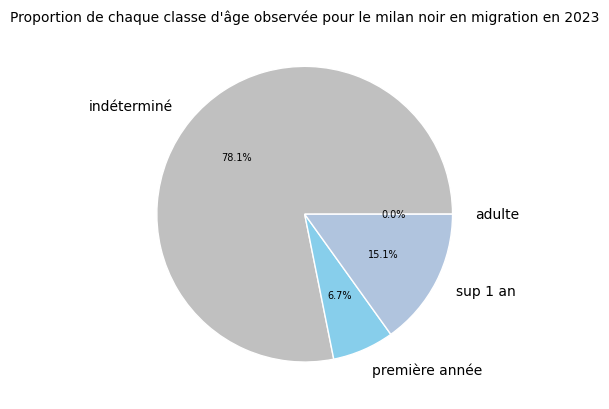

In [123]:
# Figure all years
plt.figure(figsize=(10,5))

fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(
    n_obs_age_milan_noir_NA.direction1,
    labels=n_obs_age_milan_noir_NA.age,
    labeldistance=1.15,
    autopct='%1.1f%%',  # Add percentage labels
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
    colors=['royalblue', 'silver', 'skyblue', 'lightsteelblue']
)

# Adjust percentage font size
for autotext in autotexts:
    autotext.set_fontsize(7)  # Change this value to adjust the size
    autotext.set_color('black')  # Optional: Change text color for better visibility


plt.title("Proportion de chaque classe d'âge observée pour le milan noir en migration en 2023", fontsize=10);

plt.savefig('../figures/figures_finales_rapport/prop_age_milan_noir_migration_avec_NA_2023_15_juil_15_sept.png')

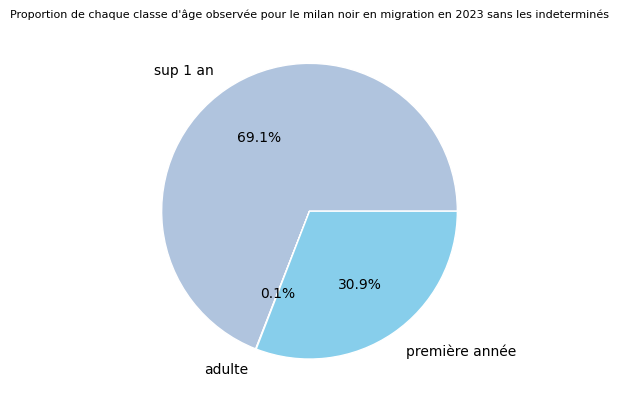

In [127]:
# Define the desired order
custom_order = ["sup 1 an", "adulte", "première année"]

# Ensure the DataFrame is ordered correctly
df = n_obs_age_milan_noir_sans_NA.set_index("age").loc[custom_order].reset_index()

# Create the pie chart
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(
    df["direction1"],  # Updated values in correct order
    labels=df["age"],  # Updated labels in correct order
    labeldistance=1.15,
    autopct='%1.1f%%',
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
    colors=['lightsteelblue','silver', 'skyblue','royalblue']
)

# Adjust percentage font size
for autotext in autotexts:
    autotext.set_fontsize(10)  # Change this value to adjust the size
    autotext.set_color('black')  # Optional: Change text color for better visibility


plt.title("Proportion de chaque classe d'âge observée pour le milan noir en migration en 2023 sans les indeterminés", fontsize=8);

plt.savefig('../figures/figures_finales_rapport/prop_age_milan_noir_migration_sans_NA_2023_15_juil_15_sept.png')

### Bondrée apivore

In [368]:
bondree_hour_age_2023 = data_hour_age_2023[data_hour_age_2023['species'].isin(['Bondrée apivore'])] # only milan noir

# I = sup 1 an
# A = adult
# 1 = premiere annee
# J = juvenile
# remove deuxieme annee

bondree_hour_age_2023.fillna('indéterminé', inplace = True) # fill NA with 'indetermine'
bondree_hour_age_2023.replace('I', 'sup 1 an', inplace=True)
bondree_hour_age_2023.replace('A', 'adulte', inplace=True)
bondree_hour_age_2023.replace('1', 'première année', inplace=True)
bondree_hour_age_2023.replace('J', 'juvénile', inplace=True)
bondree_hour_age_2023 = bondree_hour_age_2023.loc[bondree_hour_age_2023['age'] != '2']

bondree_hour_age_2023.age.unique()

/var/folders/p7/90k2qrqs4fvbt30f5t6x0glc0000gn/T/ipykernel_18542/1876452176.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bondree_hour_age_2023.fillna('indéterminé', inplace = True) # fill NA with 'indetermine'
/var/folders/p7/90k2qrqs4fvbt30f5t6x0glc0000gn/T/ipykernel_18542/1876452176.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bondree_hour_age_2023.replace('I', 'sup 1 an', inplace=True)
/var/folders/p7/90k2qrqs4fvbt30f5t6x0glc0000gn/T/ipykernel_18542/1876452176.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https:

array(['adulte', 'indéterminé', 'première année', 'sup 1 an'],
      dtype=object)

In [369]:
bondree_hour_age_2023_NA = bondree_hour_age_2023.groupby(['age'])['direction1'].sum().reset_index()

bondree_hour_age_2023_sans_NA = bondree_hour_age_2023.loc[bondree_hour_age_2023['age'] != 'indéterminé']
bondree_hour_age_2023_sans_NA = bondree_hour_age_2023_sans_NA.groupby(['age'])['direction1'].sum().reset_index()

bondree_hour_age_2023_NA

,age,direction1
0,adulte,658
1,indéterminé,2611
2,première année,130
3,sup 1 an,1


<Figure size 1000x500 with 0 Axes>

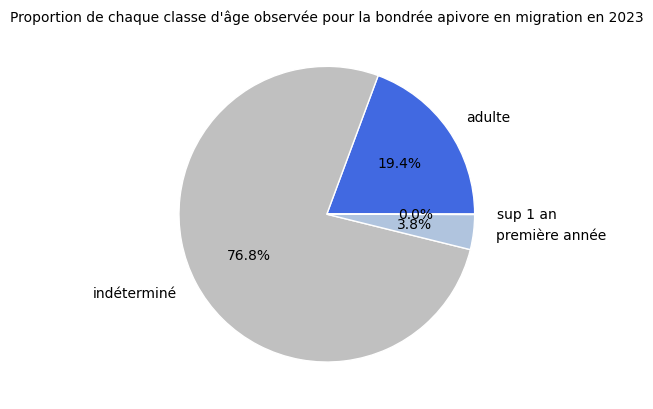

In [370]:
# Figure all years
plt.figure(figsize=(10,5))

fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(
    bondree_hour_age_2023_NA.direction1,
    labels=bondree_hour_age_2023_NA.age,
    labeldistance=1.15,
    autopct='%1.1f%%',  # Add percentage labels
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
    colors=['royalblue', 'silver','lightsteelblue', 'skyblue', 'darkcyan']
)

# Adjust percentage font size
for autotext in autotexts:
    autotext.set_fontsize(10)  # Change this value to adjust the size
    autotext.set_color('black')  # Optional: Change text color for better visibility


plt.title("Proportion de chaque classe d'âge observée pour la bondrée apivore en migration en 2023", fontsize=10);

plt.savefig('../figures/figures_finales_rapport/prop_age_bondree_migration_avec_NA_2023_15_juil_15_sept.png')

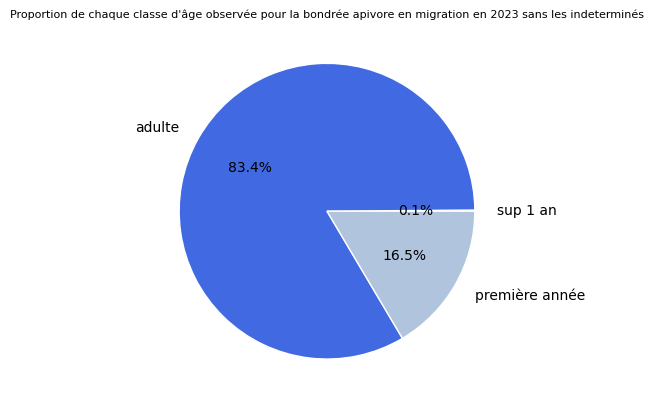

In [371]:
# Define the desired order
custom_order = ["sup 1 an", "adulte", "première année"]

# Ensure the DataFrame is ordered correctly
df = bondree_hour_age_2023_sans_NA.set_index("age").loc[custom_order].reset_index()

# Create the pie chart
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(
    df["direction1"],  # Updated values in correct order
    labels=df["age"],  # Updated labels in correct order
    labeldistance=1.15,
    autopct='%1.1f%%',
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
    colors=['darkcyan', 'royalblue','lightsteelblue']
)

# Adjust percentage font size
for autotext in autotexts:
    autotext.set_fontsize(10)  # Change this value to adjust the size
    autotext.set_color('black')  # Optional: Change text color for better visibility


plt.title("Proportion de chaque classe d'âge observée pour la bondrée apivore en migration en 2023 sans les indeterminés", fontsize=8);

plt.savefig('../figures/figures_finales_rapport/prop_age_bondree_migration_sans_NA_2023_15_juil_15_sept.png')

## Sexe

### Bondrée apivore

In [372]:
data_hour_sex_2023 = data_hour_2023[['date_dt', 'species', 'sex', 'direction1']].dropna()
bondree_sex_2023 = data_hour_sex_2023[data_hour_sex_2023['species'].isin(['Bondrée apivore'])]
bondree_sex_2023.sex.unique()

array(['M', 'F'], dtype=object)

In [373]:
bondree_sex_2023.replace('F', 'femelle', inplace=True)
bondree_sex_2023.replace('M', 'mâle', inplace=True)
bondree_sex_2023

/var/folders/p7/90k2qrqs4fvbt30f5t6x0glc0000gn/T/ipykernel_18542/3345808130.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bondree_sex_2023.replace('F', 'femelle', inplace=True)
/var/folders/p7/90k2qrqs4fvbt30f5t6x0glc0000gn/T/ipykernel_18542/3345808130.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bondree_sex_2023.replace('M', 'mâle', inplace=True)


,date_dt,species,sex,direction1
38102,2023-07-16,Bondrée apivore,mâle,0
38213,2023-07-18,Bondrée apivore,mâle,1
38728,2023-07-26,Bondrée apivore,femelle,1
38729,2023-07-26,Bondrée apivore,mâle,0
38940,2023-07-28,Bondrée apivore,femelle,0
...,...,...,...,...
42697,2023-09-13,Bondrée apivore,femelle,1
42780,2023-09-14,Bondrée apivore,mâle,1
42805,2023-09-14,Bondrée apivore,mâle,2
42984,2023-09-15,Bondrée apivore,mâle,1


In [374]:
n_obs_sex_bondree = bondree_sex_2023.groupby(['sex'])['direction1'].sum().reset_index()
n_obs_sex_bondree

,sex,direction1
0,femelle,433
1,mâle,216


<Figure size 1000x500 with 0 Axes>

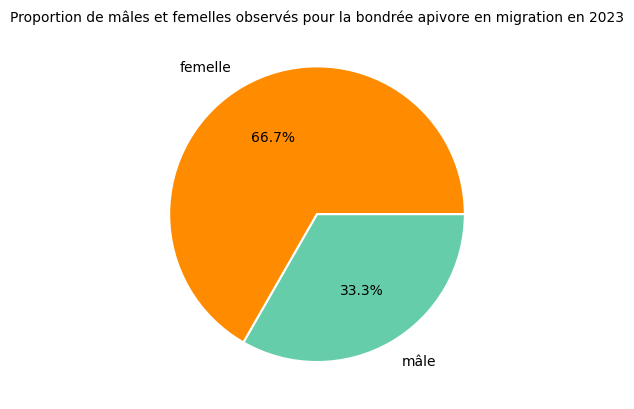

In [375]:
# Figure all years
plt.figure(figsize=(10,5))

fig, ax = plt.subplots();

ax.pie(n_obs_sex_bondree.direction1,
       labels=n_obs_sex_bondree.sex,
       labeldistance=1.15,
       autopct='%1.1f%%',  # Add percentage labels
       wedgeprops={'linewidth': 1.5, 'edgecolor': 'white'},
       colors=['darkorange','mediumaquamarine']);

plt.title("Proportion de mâles et femelles observés pour la bondrée apivore en migration en 2023", fontsize=10);

plt.savefig('../figures/figures_finales_rapport/prop_sex_bondree_apivore_migration_2023_15_juil_15_sept.png')

## Plumage

### Aigle boté

In [392]:
data_hour_plumage = data_hour[['Année','species', 'plumage', 'direction1']].dropna()
data_hour_plumage = data_hour_plumage[data_hour_plumage['species'].isin(['Aigle botté'])]
data_hour_plumage.plumage.unique()

array(['D', 'L', 'I'], dtype=object)

In [393]:
data_hour_plumage

,Année,species,plumage,direction1
1648,2014,Aigle botté,D,0
1647,2014,Aigle botté,L,0
29031,2022,Aigle botté,L,0
2405,2015,Aigle botté,L,0
7622,2017,Aigle botté,L,0
...,...,...,...,...
24633,2021,Aigle botté,L,1
10289,2017,Aigle botté,L,1
10288,2017,Aigle botté,L,0
10287,2017,Aigle botté,D,1


In [394]:
data_hour_plumage.replace('D', 'sombre', inplace=True)
data_hour_plumage.replace('L', 'clair', inplace=True)
data_hour_plumage.replace('I', 'indéterminé', inplace=True)
data_hour_plumage_sans_NA = data_hour_plumage.loc[data_hour_plumage['plumage'] != 'indéterminé']

In [396]:
n_obs_aigle_botte_plumage = data_hour_plumage.groupby(['Année','plumage'])['direction1'].sum().reset_index()
n_obs_aigle_botte_plumage

,Année,plumage,direction1
0,2011,clair,0
1,2011,sombre,0
2,2014,clair,0
3,2014,sombre,0
4,2015,clair,0
5,2016,clair,0
6,2017,clair,9
7,2017,sombre,13
8,2018,clair,2
9,2018,sombre,0


<Figure size 1000x500 with 0 Axes>

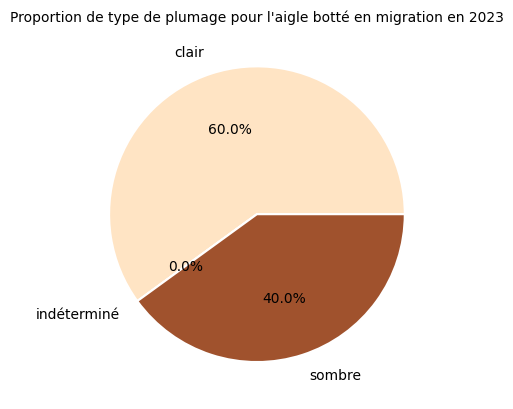

In [417]:
# Figure 2023
n_obs_aigle_botte_plumage_2023 = n_obs_aigle_botte_plumage[n_obs_aigle_botte_plumage['Année'].isin([2023])]

plt.figure(figsize=(10,5))

fig, ax = plt.subplots();

ax.pie(n_obs_aigle_botte_plumage_2023.direction1,
       labels=n_obs_aigle_botte_plumage_2023.plumage,
       labeldistance=1.15,
       autopct='%1.1f%%',  # Add percentage labels
       wedgeprops={'linewidth': 1.5, 'edgecolor': 'white'},
       colors=['bisque','black', 'sienna']);

plt.title("Proportion de type de plumage pour l'aigle botté en migration en 2023", fontsize=10);

plt.savefig('../figures/figures_finales_rapport/prop_plumage_aigle_botté_2023_15_juil_15_sept.png')

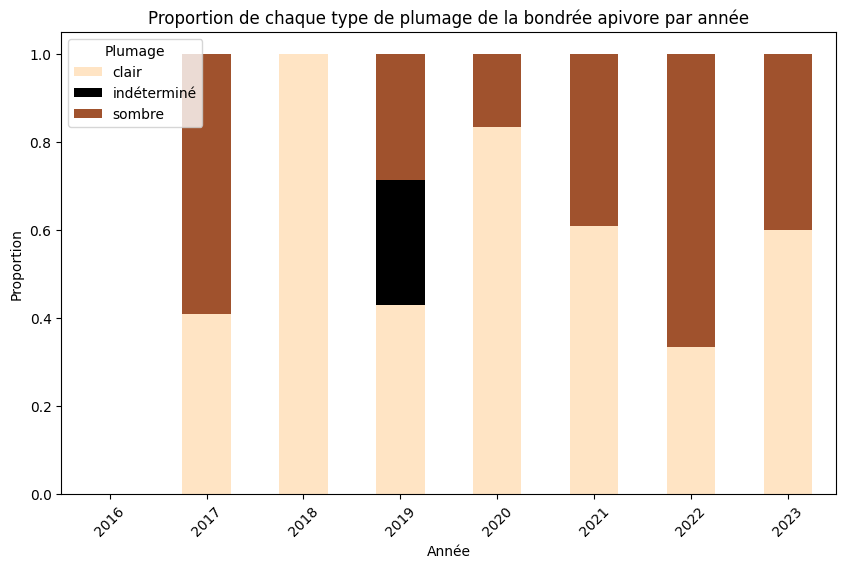

In [422]:
n_obs_aigle_botte_plumage = n_obs_aigle_botte_plumage[(n_obs_aigle_botte_plumage['Année'] >= 2016)]

# Pivot the data to get the sum of observations per 'Année' and 'plumage'
df_pivot = n_obs_aigle_botte_plumage.pivot_table(index="Année", columns="plumage", values="direction1", aggfunc="sum", fill_value=0)

# Normalize to get proportions
df_pivot = df_pivot.div(df_pivot.sum(axis=1), axis=0)

# Define custom colors
custom_colors = ['bisque', 'black', 'sienna']

# Plot stacked bar chart
ax = df_pivot.plot(kind="bar", stacked=True, color=custom_colors, figsize=(10, 6))

plt.xlabel("Année")
plt.ylabel("Proportion")
plt.title("Proportion de chaque type de plumage de la bondrée apivore par année")
plt.legend(title="Plumage")
plt.xticks(rotation=45)

# Save the figure before showing it
plt.savefig('../figures/figures_finales_rapport/prop_plumage_aigle_botté_tous_les_ans_15_juil_15_sept.png')

# Show the plot after saving
plt.show()